<a href="https://colab.research.google.com/github/BalnurShulenbay/Data-Analysis/blob/Airbnb-price-prediction/Airbnb_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏠 The goal is to set the competitive daily accomodation rate for a client's house in Bondi Beach. The owner currently charges $500. My goal is to estimate a fair value that the owner should be charging. The house has the following characteristics and constraints.

* The owner has been a host since August 2010
* The location is lon:151.274506, lat:33.889087
* The current review score rating 95.0
* Number of reviews 53
* Minimum nights 4
* The house can accomodate 10 people.
* The owner currently charges a cleaning fee of 370
* The house has 3 bathrooms, 5 bedrooms, 7 beds.
* The house is available for 255 of the next 365 days
* The client is verified, and they are a superhost.
* The cancelation policy is strict with a 14 days grace period.
* The host requires a security deposit of $1,500



Loading the data :

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
github_p="https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"
df=pd.read_csv(github_p+'datasets/sydney_airbnb.csv')

<ipython-input-2-39e3b091be8e>:5: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(github_p+'datasets/sydney_airbnb.csv')


In [ ]:
# Getting the first 5 rows of the data frame
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


Check for nulls

In [ ]:
print(df.isnull().sum())

id                                     0
listing_url                            0
name                                  14
summary                              305
space                               8262
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   6824
Length: 84, dtype: int64


Filling the nulls

In [ ]:
df['name'] = df['name'].fillna("Unknown")
df['summary'] = df['summary'].fillna("No description")
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

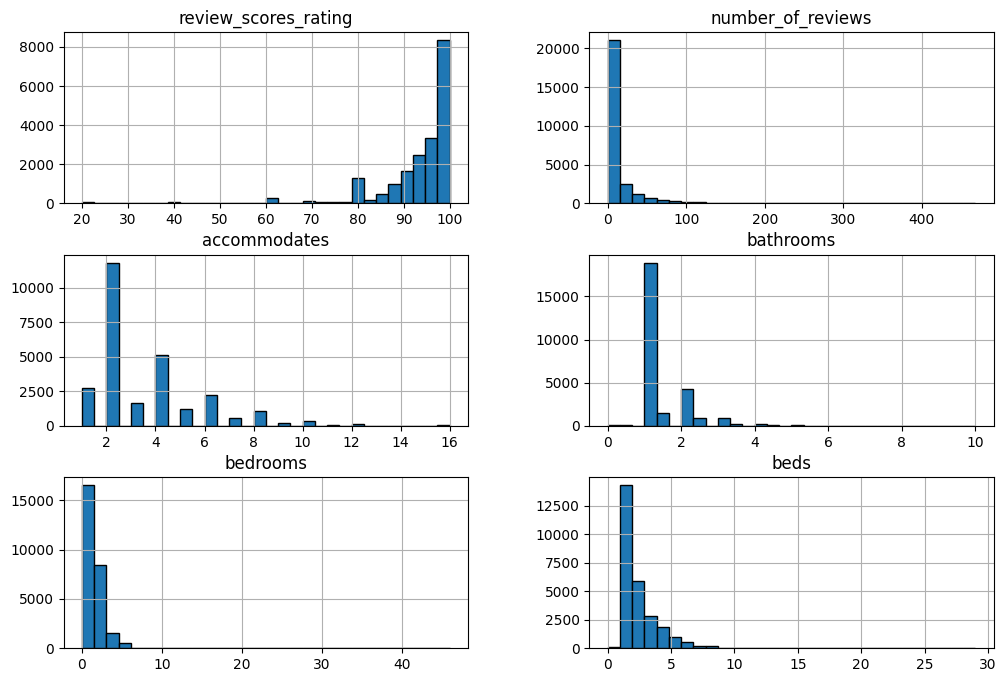

In [ ]:
# Buiding overall descriptive plots
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered=df[['review_scores_rating', 'number_of_reviews',
    'accommodates', 'cleaning_fee', 'bathrooms', 'bedrooms', 'beds', 'security_deposit']]
df_filtered.hist(figsize=(12,8),bins=30,edgecolor='black')
plt.show()

In [ ]:
# Limiting the neighbourhood to Bondi beach
bondi_df = df[df['neighbourhood']== "Bondi Beach"].copy()

# Convert price-related columns to numeric safely
price_columns = ['price', 'cleaning_fee', 'security_deposit']
bondi_df[price_columns] = bondi_df[price_columns].replace('[\$,]', '', regex=True).astype(float)

# Convert categorical variables safely
bondi_df['host_is_superhost'] = bondi_df['host_is_superhost'].replace({'t': 1, 'f': 0})


<ipython-input-7-df3b66e38c81>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bondi_df['host_is_superhost'] = bondi_df['host_is_superhost'].replace({'t': 1, 'f': 0})


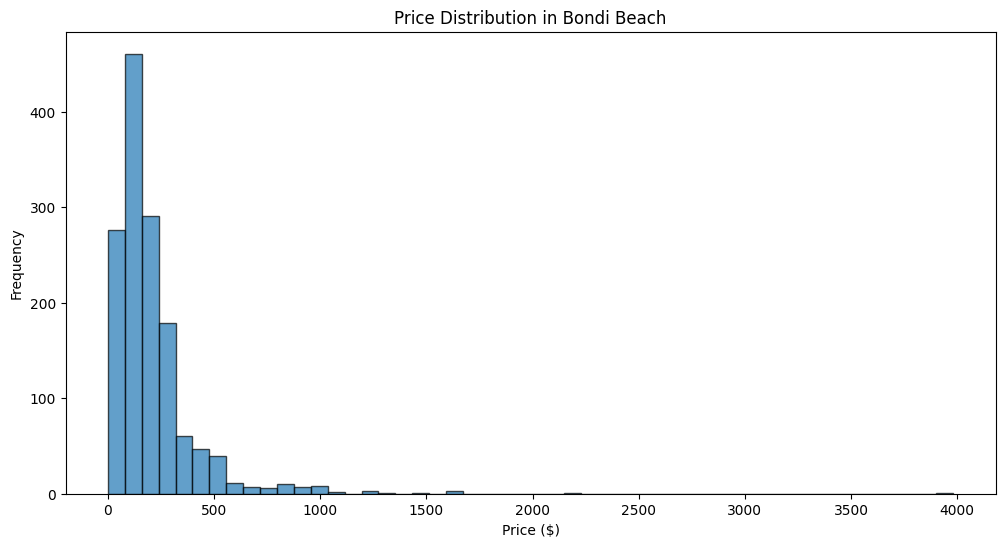

In [ ]:
# PLotting the Price distibution in Bondi Beach
plt.figure(figsize=(12, 6))
plt.hist(bondi_df['price'], bins=50, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title("Price Distribution in Bondi Beach")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
# Defining the important columns as features
features = [
    'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'review_scores_rating', 'number_of_reviews', 'cleaning_fee',
    'security_deposit', 'availability_365', 'longitude', 'latitude'
]
# Defining the X and the Y for the future modules
X = bondi_df[features]
y = bondi_df['price']

In [ ]:
X.dtypes

,0
host_is_superhost,float64
accommodates,int64
bathrooms,float64
bedrooms,float64
beds,float64
review_scores_rating,float64
number_of_reviews,int64
cleaning_fee,float64
security_deposit,float64
availability_365,int64


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Deviding the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Using Random Forest Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Calculating Mean Absolute Error
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"Mean Absolute Error: ${-scores.mean():.2f}")


Mean Absolute Error: $83.90


In [ ]:
# Getting the average price
mean_price = y.mean()
print(f"Average Listing Price: ${mean_price:.2f}")

Average Listing Price: $207.08


In [ ]:
# Define the client's house features
client_house = pd.DataFrame({
    'host_is_superhost': [1],
    'accommodates': [10],
    'bathrooms': [3],
    'bedrooms': [5],
    'beds': [7],
    'review_scores_rating': [95.0],
    'number_of_reviews': [53],
    'cleaning_fee': [370],
    'security_deposit': [1500],
    'availability_365': [255],
    'longitude': [151.274506],
    'latitude': [33.889087]
})

# Predict the price
predicted_price = model.predict(client_house)[0]
print(f"Estimated Fair Price: ${predicted_price:.2f} per night")

Estimated Fair Price: $805.08 per night
